<font color=black size=7 face="黑体">Nosql</font>

NoSQL is a new revolutionary database movement. It has been proposed since 2009. Compared to the overwhelming use of relational databases, using non-relational data storage is undoubtedly a new kind of thinking.

<font color=black size=5 face="黑体">what is no sql</font>

NoSQL is non-relational databases. NoSQL, sometimes referred to as Not Only SQL, is a generic term for database management systems that differ from traditional relational databases.

NoSQL is used for storing large-scale data. These types of data storage do not require a fixed pattern and can scale out without additional operations.

<font color=black size=5 face="黑体">why use nosql</font>

Nowadays, we can easily access and retrieve data through third-party platforms. The user's personal information, social network, geographic location, user-generated data increase everyday. SQL database is not suitable for these applications if we want to mine these user data，but NoSQL database can handle well.

<font color=black size=5 face="黑体">advantage</font>

1.Storing large volumes of data
2.Making the most of cloud computing and storage
3.Eventually consistent, not ACID properties
4.Unstructured and unpredictable data
5.CAP theorem
6.High performance, high availability and scalability

<font color=black size=5 face="黑体">tool</font>

Mongodb

<font color=black size=5 face="黑体">how to use Mongodb</font>

1.install Mongodb

2.connect Mongodb

In [1]:
from pymongo import MongoClient
mongo_client = MongoClient("localhost",27017)

In [2]:
mongo_client.analytics

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'analytics')

3.create database(I want to crate a database named portfolio in mongodb)

In [3]:
db = mongo_client.portfolio

In [4]:
db.analytics

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'portfolio'), 'analytics')

4.import project data(for example, I import table 'player', which is one of tables in my data)

In [5]:
import csv
import json
import pandas as pd
import sys, getopt, pprint
csvfile = open('player.csv','r')
reader = csv.DictReader(csvfile)
db.player.drop()
header = ["id","name","age","height_cm","weight_kg", "overall", "potential", "club"]

for each in reader:
    row = {}
    for field in header:
        row[field]=each[field]
        
    db.player.insert(row)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  from ipykernel import kernelapp as app


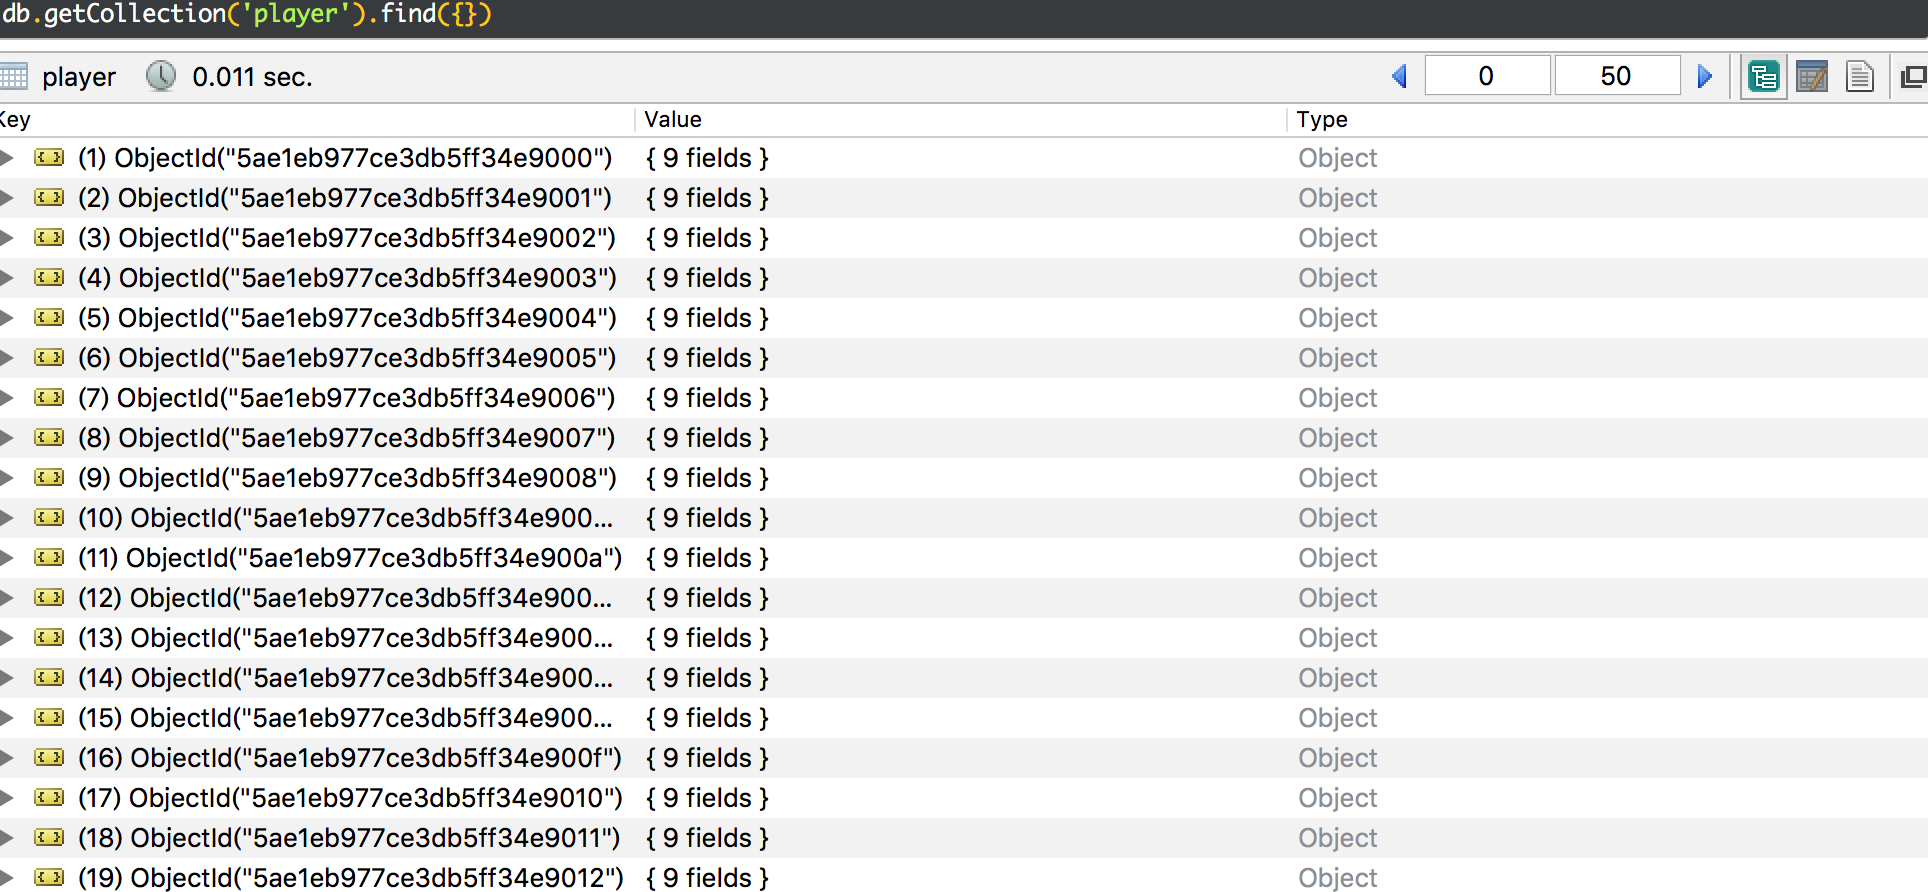

4.find duplicate data

In [10]:
for post in db.player.find({"name": "Cristiano Ronaldo"}):
    pprint.pprint(post)

{'_id': ObjectId('5ae1eeb77ce3db60d192c893'),
 'age': '32',
 'club': 'Real Madrid CF',
 'height_cm': '185',
 'id': '0',
 'name': 'Cristiano Ronaldo',
 'overall': '94',
 'potential': '94',
 'weight_kg': '80'}


<font color=black size=5 face="黑体">Result:'Cristiano Ronaldo' shows once in column "name"</font> 

5.insert data

In [17]:
for post in db.player.find({"name": "Bill Bilibi"}):
    pprint.pprint(post)

<font color=black size=5 face="黑体">Result：nobody named "Bill Bilibi"</font> 

In [18]:
post = {"id":17994,
        "name":"Bill Bilibi",
        "height_cm":200,
        "weight_kg":200, 
        "overall":100, 
        "potential":100, 
        "club":"FC Shanghai Shenhua"}
db.player.insert(post)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  


ObjectId('5ae1f94e7ce3db60d1930ede')

In [19]:
for post in db.player.find({"name": "Bill Bilibi"}):
    pprint.pprint(post)

{'_id': ObjectId('5ae1f94e7ce3db60d1930ede'),
 'club': 'FC Shanghai Shenhua',
 'height_cm': 200,
 'id': 17994,
 'name': 'Bill Bilibi',
 'overall': 100,
 'potential': 100,
 'weight_kg': 200}


<font color=black size=5 face="黑体">Result: player "Bill Bilibi" has been inserted</font> 

6.update data

In [20]:
db.player.update_one({'name':"Bill Bilibi"},{'$set':{'name':"Bob Bilibi"}})

In [22]:
for post in db.player.find({"id": 17994}):
    pprint.pprint(post)

{'_id': ObjectId('5ae1f94e7ce3db60d1930ede'),
 'club': 'FC Shanghai Shenhua',
 'height_cm': 200,
 'id': 17994,
 'name': 'Bob Bilibi',
 'overall': 100,
 'potential': 100,
 'weight_kg': 200}


<font color=black size=5 face="黑体">Result: player "Bill Bilibi" has been update to "Bob Bilibi"</font>

6.delete data

In [24]:
db.player.delete_one({'id': 17994})

In [25]:
for post in db.player.find({'id': 17994}):
    pprint.pprint(post)

<font color=black size=5 face="黑体">Result: player "Bob Bilibi" has been deleted</font> 

7.count

In [27]:
db.player.find({'club':"Real Madrid CF"}).count()

28

License (MIT)
Copyright (c)2018 by Bingling Fu, Chi zhang, Zhiwei Zhang
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.